## Author Name :- Kiran Vijay Patil

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,confusion_matrix
from scipy.stats import norm

### Import Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ARJUN SALUNKHE\Documents\Kiran Patil\datasets\insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


### Exploratory Data Analysis

In [3]:
# Basic Statistical information
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Find out how much peoples are smokes daily but claim their insurance.

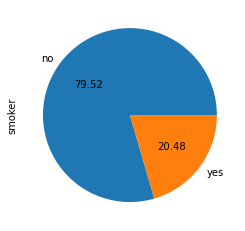

In [4]:
df["smoker"].value_counts().plot(kind="pie",autopct="%1.2f")
plt.show()

* 20.48% peoples are smoke daily claims their insurance.

### Find out which regions peoples claim their insurance.

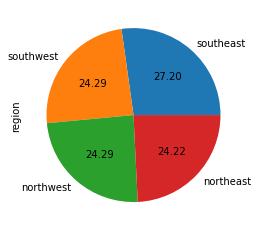

In [5]:
df["region"].value_counts().plot(kind="pie",autopct="%1.2f")
plt.show()

* Peoples who region is southeast they mostly claims their insurance.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


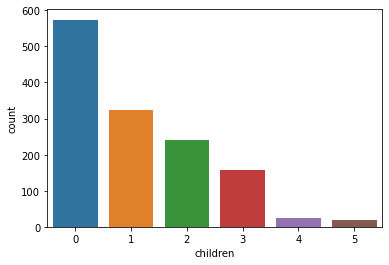

In [6]:
sns.countplot(df["children"])
plt.show()

* Peoples who dont have any child they mostly claims their insurance.

### Check what is the age percentage of peoples who claims their insurance.

In [7]:
# child_age ==> 0-12
# teen_age ==> 12-25
# adult_age ==> 25-50
# old_age ==> 50 & Above



Age=[]
for i in df["age"]:
    if 0<i<=12:
        Age.append("child_age")
    elif 12<i<=25:
        Age.append("Teen_age")
    elif 25<i<=50:
        Age.append("adult_age")
    else:
        Age.append("old_age")

In [8]:
df["Age_class"]=Age

<AxesSubplot:ylabel='Age_class'>

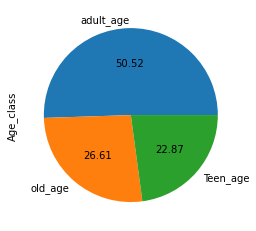

In [9]:
df["Age_class"].value_counts().plot(kind="pie",autopct="%1.2f")

* The peoples whose age is between 25-50 years they mostly claims their insurance.

### Find out those peoples whose age is between 25-50 and bmi is 18.5 to 24.9 & never smoked. and visualize it.

In [10]:
data=df.loc[((df["Age_class"]=="adult_age")&(df["smoker"]=="no"))]
bmi_data=data.loc[((data["bmi"]<=24.9)&(data["bmi"]>=18.5))]

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


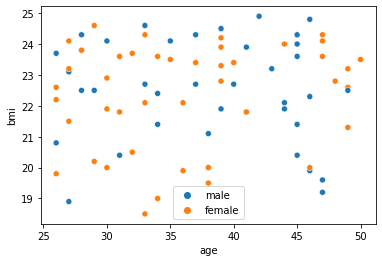

In [11]:
sns.scatterplot(bmi_data["age"],data["bmi"],hue=bmi_data["sex"])
plt.legend()
plt.show()

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


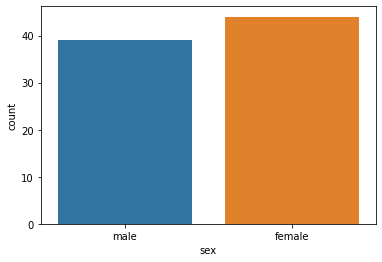

In [12]:
sns.countplot(bmi_data["sex"])
plt.show()

In [13]:
bmi_data["sex"].value_counts()

female    44
male      39
Name: sex, dtype: int64

* Count of females (44) is greater than the count of male (39) who has ideal bmi & never smoked with the age between 25-50 years.

### Label Encoding

In [14]:
le=LabelEncoder()
del df["Age_class"]
col=["sex","smoker","region"]
for i in col:
    df[i]=le.fit_transform(df[i])

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


### correlation

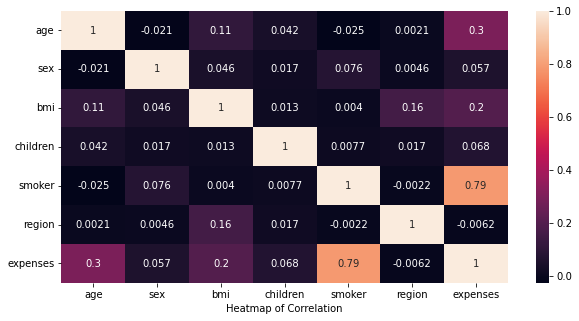

In [16]:
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,fmt=".2g")
plt.xlabel("Heatmap of Correlation")
plt.show()

### Check outliers
* 1) Scatter plot
* 2) Box plot

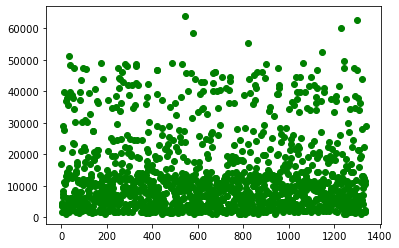

In [17]:
plt.plot(df["expenses"],"o",color="green")
plt.plot()
plt.show()

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


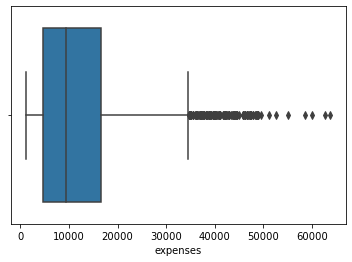

In [18]:
sns.boxplot(df["expenses"])
plt.show()

### Result:-
* We clearly seen that the outliers present in dataset. 

### What is the distribution of dependent column And compare it with normal distribution.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

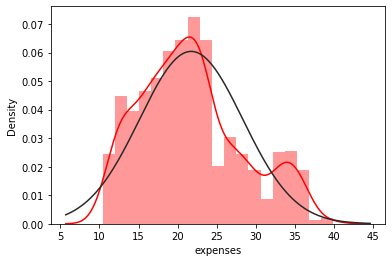

In [19]:
y=df.iloc[:,-1]
Y=np.cbrt(y)
sns.distplot(Y,fit=norm,color="red")

### Result :- 
* Distribution of the dependent column is positively skewed (Right skewed) distribution.
* Black graph shows the graph of normal distribution.

### Feature Selection

In [20]:
x=df.iloc[:,:-1]

### Feature Scaling
* Use Min Max Scaler to Normalise your data.

In [21]:
ms=MinMaxScaler()
norm_data=ms.fit_transform(x)

In [22]:
ind_norm_data=pd.DataFrame(norm_data)
ind_norm_data

,0,1,2,3,4,5
0,0.021739,0.0,0.320755,0.0,1.0,1.000000
1,0.000000,1.0,0.479784,0.2,0.0,0.666667
2,0.217391,1.0,0.458221,0.6,0.0,0.666667
3,0.326087,1.0,0.180593,0.0,0.0,0.333333
4,0.304348,1.0,0.347709,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.695652,1.0,0.404313,0.6,0.0,0.333333
1334,0.000000,0.0,0.428571,0.0,0.0,0.000000
1335,0.000000,0.0,0.563342,0.0,0.0,0.666667
1336,0.065217,0.0,0.264151,0.0,0.0,1.000000


* Our independent data is converted in normalisation data.

### Split our data into training and testing data.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(norm_data,Y,test_size=0.2,random_state=81)

In [24]:
print("shape of independent training data is",x_train.shape)
print("shape of independent testing data is",x_test.shape)
print("shape of dependent training data is",y_train.shape)
print("shape of dependent testing data is",y_test.shape)

shape of independent training data is (1070, 6)
shape of independent testing data is (268, 6)
shape of dependent training data is (1070,)
shape of dependent testing data is (268,)


### Model Selection
* Random Forest Regressor

In [25]:
rfr=RandomForestRegressor()
RFR=rfr.fit(x_train,y_train)
RFR

RandomForestRegressor()

In [26]:
y_pred=rfr.predict(x_test)

In [27]:
acc=r2_score(y_test,y_pred)*100
print(acc)

77.27483178015532


In [28]:
mae=mean_absolute_error(y_test,y_pred)
mae

1.609698720705843

In [29]:
mse=mean_squared_error(y_test,y_pred)
mse

10.018651509791676

In [30]:
dataframe=pd.DataFrame({"Actual Value":y_test,"Predicted value":y_pred})

In [31]:
dataframe

,Actual Value,Predicted value
696,30.788881,23.109867
826,35.253632,35.243068
1115,22.109298,22.481090
823,20.181023,21.163103
1173,18.622119,18.582564
...,...,...
1332,22.513861,22.938429
304,23.298080,23.524452
355,29.084592,20.829902
1114,13.381403,13.405654


C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual Value', ylabel='Predicted value'>

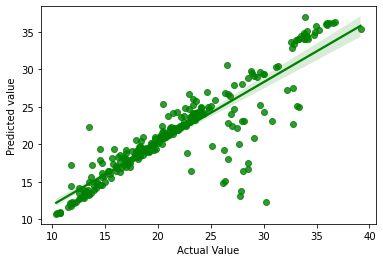

In [32]:
sns.regplot("Actual Value","Predicted value",data=dataframe,color="green")